# Tutorial 1 - Introduction To Jupyter and NumPy

Welcome to the code side of [*Introduction to Fluid Dynamics*](https://josephmacmillan.github.io/IntroductionToFluidDynamics/).  This is a [Jupyter Notebook](https://jupyter.org/), which is a nice way to present both text and code all in one convenient package.

This introductory notebook will take us through some of the basic of writing and running Jupyter notebooks, as well as using [NumPy](https://numpy.org/) and [MatPlotLib](https://matplotlib.org/) to handle numerical calculation and plotting.

## 1.1 Jupyter and Python Basics

So, this is a "markdown" type cell in Jupyter -- it's how you display text, equations (using Latex code), and images.  There's also a "code" cell type, and we'll get to that in a moment.  But regardless of the type of cell, you "compile" it by either clicking the Run button above or pressing ctrl-Enter (or shift-Enter if you also want to select the next cell down).  You can double-click on the cell to see and edit the underlying markdown.

Let's try a code cell; we're using Python 3 for the code, so we'll enter a simple line of Python and see what happens.

In [1]:
print("Hello, world!")

Hello, world!


Once again, to run the code, just hit ctrl-Enter, and the notebook should print out the statement.

Now, I'll assume you have some familiarity with Python -- if not, there are some great tutorials out there (like [this one from SciPy](https://scipy-lectures.org/intro/)).  To refresh your memory and get us started let's do something pretty simple:  calculate the sine of an angle.

To start, we'll create a variable, assign it an angle, and print out the sine of that angle:

In [2]:
from math import pi, sin

theta = pi / 3

print(f"sin({theta:.3f}) = {sin(theta):.3f}")

sin(1.047) = 0.866


First we imported the sine function (and the number pi!) from the math library, assigned the value to the variable theta, and printed out the answer.  If you're not familiar with [Python's f-strings](https://docs.python.org/3/tutorial/inputoutput.html#tut-f-strings), I highly recommend using them.

What if we wanted to calculate the sine of a whole bunch of angles?  Here's one way we could do that:

In [3]:
# first create a list of all the angles we want
N = 10
angles = []
for i in range(N):
    angles.append(i/(N-1) * pi)

# then calculate the sines
sines = []
for i in range(N):
    sines.append(sin(angles[i]))
    
print(angles)
print(sines)

[0.0, 0.3490658503988659, 0.6981317007977318, 1.0471975511965976, 1.3962634015954636, 1.7453292519943295, 2.0943951023931953, 2.443460952792061, 2.792526803190927, 3.141592653589793]
[0.0, 0.3420201433256687, 0.6427876096865393, 0.8660254037844386, 0.984807753012208, 0.984807753012208, 0.8660254037844387, 0.6427876096865395, 0.3420201433256689, 1.2246467991473532e-16]


I could have been more concide with this, of course, but the fact remains that Python doesn't do lists or arrays very well (and is usually quite slow with them).  That's where NumPy comes in.

## 1.2 NumPy Basics

Let's do the same calculation, but this time using NumPy arrays.  We'll have to import the NumPy library, which we'll call "np" in the code, and preface the functions and variables we want to use with np.  Here goes -- first the simple calculation:

In [4]:
import numpy as np

theta = np.pi / 3

print(f"sin({theta:.3f}) = {np.sin(theta):.3f}")

sin(1.047) = 0.866


Now the range of values:

In [5]:
angles = np.linspace(0, np.pi, 10)
sines = np.sin(angles)

print(angles)
print(sines)

[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]
[0.00000000e+00 3.42020143e-01 6.42787610e-01 8.66025404e-01
 9.84807753e-01 9.84807753e-01 8.66025404e-01 6.42787610e-01
 3.42020143e-01 1.22464680e-16]


That's quite a bit shorter, faster (especially when there's a lot of elements -- try changing N), and easier to do.

Let's run through some of the most common things to do with Numpy, starting with creating arrays.  I used np.linspace in the code above to create an array -- you specify how many array elements you want with that.  But you can also specify the step size with np.arange:

In [6]:
angles = np.arange(0, np.pi, 0.1)
print(angles)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1]


If you want something more complicated that a range of numbers, you might need to create an array that just contains zeros:

In [7]:
x = np.zeros(N)
print(x)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Once you have an array, you can operate on it in a variety of ways.  For example, you can quickly find the maximum value:

In [8]:
print(f"The maximum value of the sines array is {sines.max()}, which is at position {sines.argmax()} in the array.")

The maximum value of the sines array is 0.984807753012208, which is at position 4 in the array.


The best thing about NumPy arrays is that you can operate on the entire array at once, without building a loop.  For example, we can add a number to every element like this:

In [9]:
angles += 1.0
print(angles)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1]


Same goes for multiplying or using a NumPy function like np.sin().

Before we move on to plotting, let's make a complicated function to plot.

In [10]:
N = 100
x = np.linspace(0, 5, N)
f = np.sqrt(np.sin(x) + 2.0 * (np.exp(-x)-1)**2)

print(x, f)

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

## 1.3 Plotting with MatPlotLib

We'll be using MatPlotLib, a Python plotting library, for graphing and visualziation.  It can be as simple to use as just importing the library and calling the "plot" function:

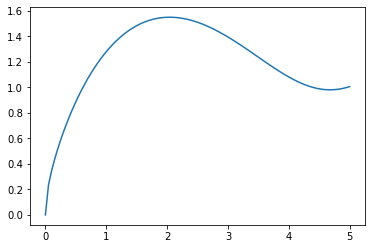

In [11]:
import matplotlib.pyplot as plt

plt.plot(x, f)

However, my preference is to use a more object-oriented approach by creating an axis and modifying that:

Text(0, 0.5, '$f(x)$')

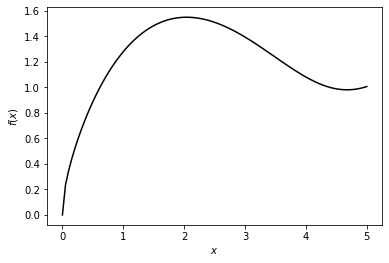

In [12]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, f, color="black")
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")

Just one last thing to cover before we move on; I'd like to make sure the fonts that I use in the plots like nice.  Here's the code for that:

In [13]:
from matplotlib import rc

rc('text.latex',preamble='\\usepackage{libertine}\n\\usepackage[libertine]{newtxmath}')
rc('font',**{'family':'serif','serif':['Linux Libertine O']}, size=18)
rc('text', usetex=True)

Text(0, 0.5, '$f(x)$')

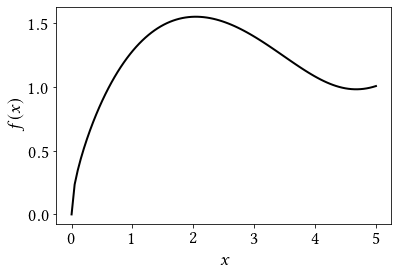

In [18]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, f, color="black", linewidth=2)
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")